#Data Wrangling


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [14,9]
plt.rcParams.update({'font.size': 14})

In [ ]:
revenue_df = pd.read_csv("revenue.csv")
pl_df = pd.read_csv("pl.csv")

In [ ]:
revenue_df

,Quarter,gsc_my_r,amc_us_r,cineplex_ca_r,wanda_cn_r,netflix_sm_r
0,'19 Q4,147480,1447700,443220,3841220,5467434
1,'20 Q1,78058,941500,364624,1254690,5767691
2,'20 Q2,1464,18900,21988,717620,6148286


In [ ]:
pl_df

,Quarter,gsc_my_pl,amc_us_pl,cineplex_ca_pl,wanda_cn_pl,netflix_sm_pl
0,'19 Q4,11578,-13500,3472,1035090,586970
1,'20 Q1,-19473,-2176300,-178414,-157340,709067
2,'20 Q2,-41446,-561200,-98927,-788390,720196


In [ ]:
#Getting a list of column names
companies_r = list(revenue_df.columns)[1:]
companies_pl = list(pl_df.columns)[1:]

print(companies_r)
print(companies_pl)

['gsc_my_r', 'amc_us_r', 'cineplex_ca_r', 'wanda_cn_r', 'netflix_sm_r']
['gsc_my_pl', 'amc_us_pl', 'cineplex_ca_pl', 'wanda_cn_pl', 'netflix_sm_pl']


In [ ]:
#Getting % Change Columns

for co in companies_r:
  revenue_df[co + "_%"] = round((revenue_df[co].diff() / revenue_df[co].abs().shift() * 100),2)

for co in companies_pl:
  pl_df[co + "_%"] = round((pl_df[co].diff() / pl_df[co].abs().shift() * 100),2)


In [ ]:
#Variables containing the % Change Dataframe
revenue_change = revenue_df.drop(columns=companies_r + ['Quarter']).dropna()
pl_change = pl_df.drop(columns=companies_pl + ['Quarter']).dropna()


In [ ]:
revenue_change

,gsc_my_r_%,amc_us_r_%,cineplex_ca_r_%,wanda_cn_r_%,netflix_sm_r_%
1,-47.07,-34.97,-17.73,-67.34,5.49
2,-98.12,-97.99,-93.97,-42.80,6.60


In [ ]:
pl_change

,gsc_my_pl_%,amc_us_pl_%,cineplex_ca_pl_%,wanda_cn_pl_%,netflix_sm_pl_%
1,-268.19,-16020.74,-5238.65,-115.20,20.80
2,-112.84,74.21,44.55,-401.07,1.57


In [ ]:
fin_quarters = list(revenue_df['Quarter'].unique())

fin_quarters

["'19 Q4", "'20 Q1", "'20 Q2"]

In [ ]:
revenue_change_raw = revenue_change.dropna().values.tolist()
revenue_change_val = [item for items in revenue_change_raw for item in items if items if isinstance(item, float)]
companies_r_val = companies_r + companies_r

print(revenue_change_val)
print(companies_r_val)

[-47.07, -34.97, -17.73, -67.34, 5.49, -98.12, -97.99, -93.97, -42.8, 6.6]
['gsc_my_r', 'amc_us_r', 'cineplex_ca_r', 'wanda_cn_r', 'netflix_sm_r', 'gsc_my_r', 'amc_us_r', 'cineplex_ca_r', 'wanda_cn_r', 'netflix_sm_r']


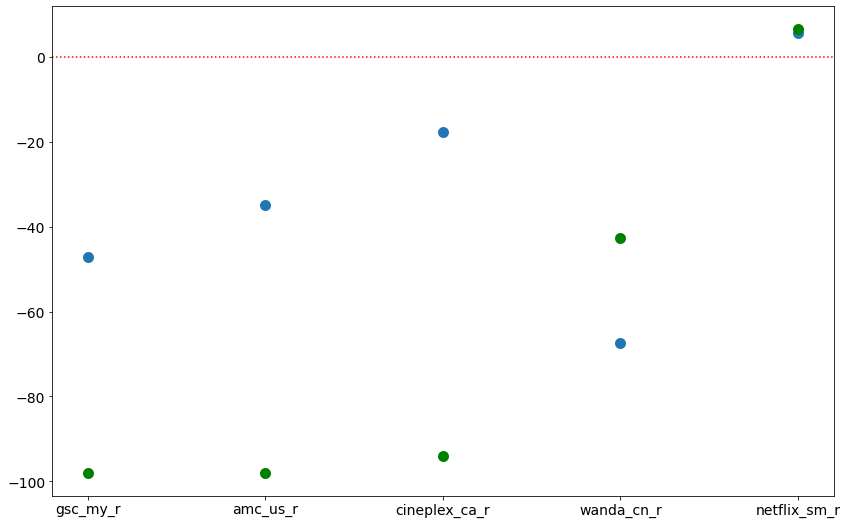

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.scatter(companies_r, revenue_change_val[:5],linewidths=5)
_ = plt.scatter(companies_r, revenue_change_val[5:], c='g',linewidths=5)
_ = plt.axhline(y=0, color='r', linestyle='dotted')

plt.show()

In [ ]:
pl_change_raw = pl_change.dropna().values.tolist()
pl_change_val = [item for items in pl_change_raw for item in items if items if isinstance(item, float)]
companies_pl_val = companies_pl + companies_pl

print(pl_change_val)
print(companies_pl_val)

[-268.19, -16020.74, -5238.65, -115.2, 20.8, -112.84, 74.21, 44.55, -401.07, 1.57]
['gsc_my_pl', 'amc_us_pl', 'cineplex_ca_pl', 'wanda_cn_pl', 'netflix_sm_pl', 'gsc_my_pl', 'amc_us_pl', 'cineplex_ca_pl', 'wanda_cn_pl', 'netflix_sm_pl']


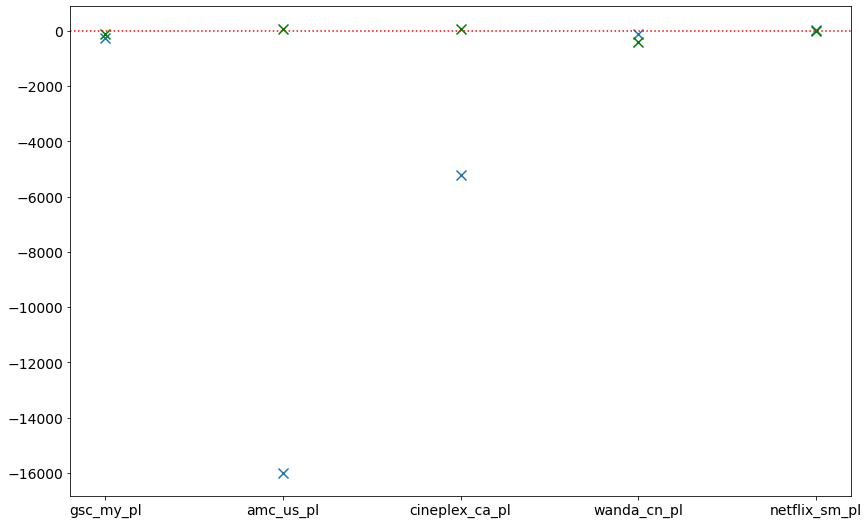

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.scatter(companies_pl, pl_change_val[:5],s=100,marker='x',linewidths=5)
_ = plt.scatter(companies_pl, pl_change_val[5:], c='g',s=100,marker='x',linewidths=5)
_ = plt.axhline(y=0, color='r', linestyle='dotted')

plt.show()

In [ ]:
companies_pl_val_f = [companies_pl[0], companies_pl[3], companies_pl[4]]

print(companies_pl_val_f)

['gsc_my_pl', 'wanda_cn_pl', 'netflix_sm_pl']


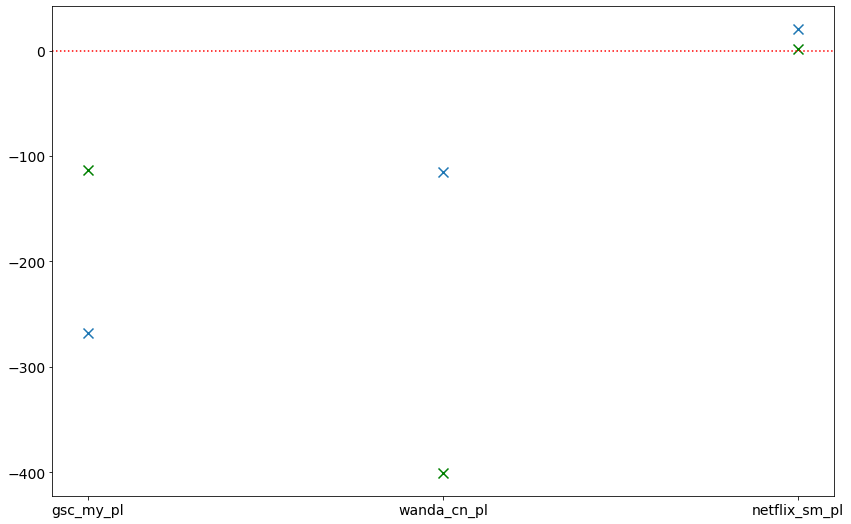

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.scatter([companies_pl[0], companies_pl[3], companies_pl[4]], [pl_change_val[0], pl_change_val[3], pl_change_val[4]],s=100,marker='x',linewidths=5)
_ = plt.scatter([companies_pl[0], companies_pl[3], companies_pl[4]], [pl_change_val[5], pl_change_val[8], pl_change_val[9]], c='g',s=100,marker='x',linewidths=5)
_ = plt.axhline(y=0, color='r', linestyle='dotted')

plt.show()

# GSC Cinemas (PPB Berhad)
Business Segment : Film exhibition and distribution

Source : https://www.bursamalaysia.com/market_information/announcements/company_announcement?company=4065&cat=FA,FRCO


In [ ]:
gsc_revenue = revenue_df['gsc_my_r']
gsc_revenue_c = revenue_change['gsc_my_r_%']
gsc_pl = pl_df['gsc_my_pl']
gsc_pl_c = pl_change['gsc_my_pl_%']

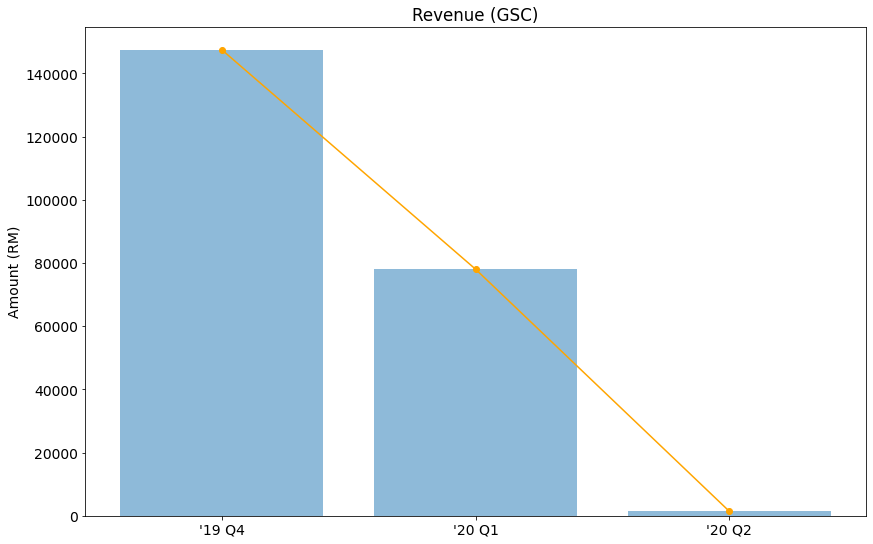

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, gsc_revenue, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, gsc_revenue, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Revenue (GSC)')

plt.show()

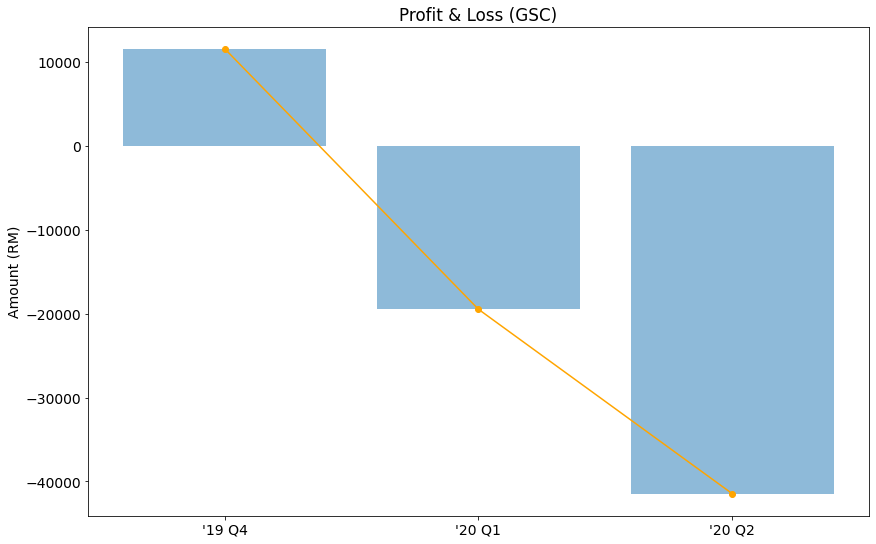

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, gsc_pl, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, gsc_pl, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Profit & Loss (GSC)')

plt.show()

#AMC Entertainment
Total Revenues were used which included US and International source (Consolidated)

Source : http://investor.amctheatres.com/sec-filings

In [ ]:
amc_revenue = revenue_df['amc_us_r']
amc_revenue_c = revenue_change['amc_us_r_%']
amc_pl = pl_df['amc_us_pl']
amc_pl_c = pl_change['amc_us_pl_%']

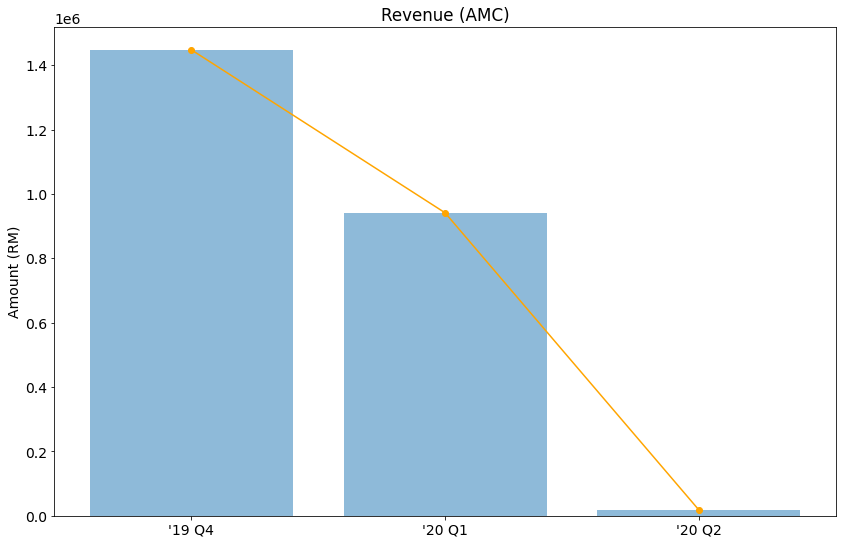

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, amc_revenue, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, amc_revenue, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Revenue (AMC)')

plt.show()

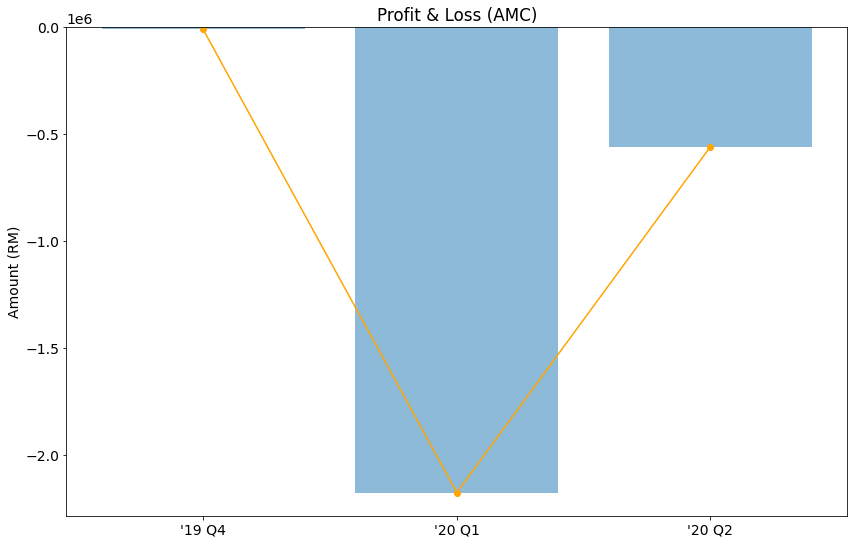

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, amc_pl, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, amc_pl, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Profit & Loss (AMC)')

plt.show()

#Cineplex
source : http://ir.cineplex.com/Home


In [ ]:
cineplex_revenue = revenue_df['cineplex_ca_r']
cineplex_revenue_c = revenue_change['cineplex_ca_r_%']
cineplex_pl = pl_df['cineplex_ca_pl']
cineplex_pl_c = pl_change['cineplex_ca_pl_%']

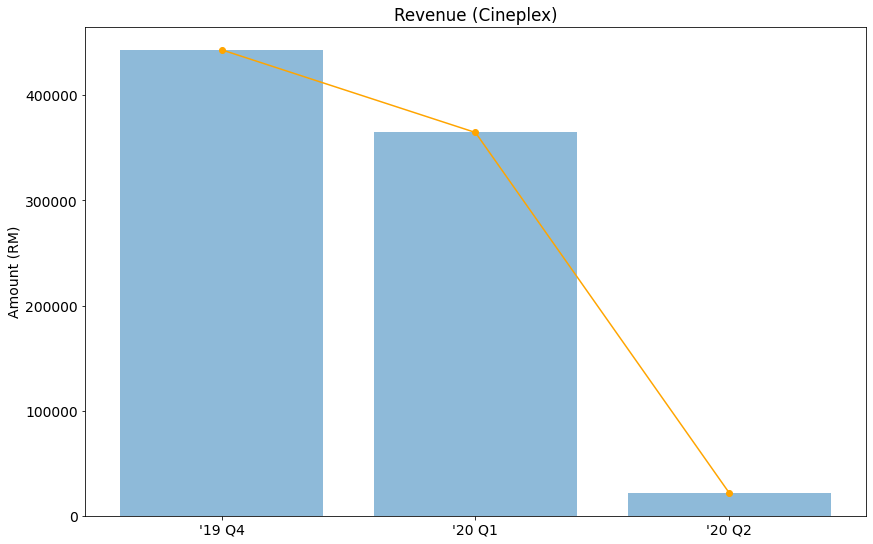

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, cineplex_revenue, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, cineplex_revenue, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Revenue (Cineplex)')

plt.show()

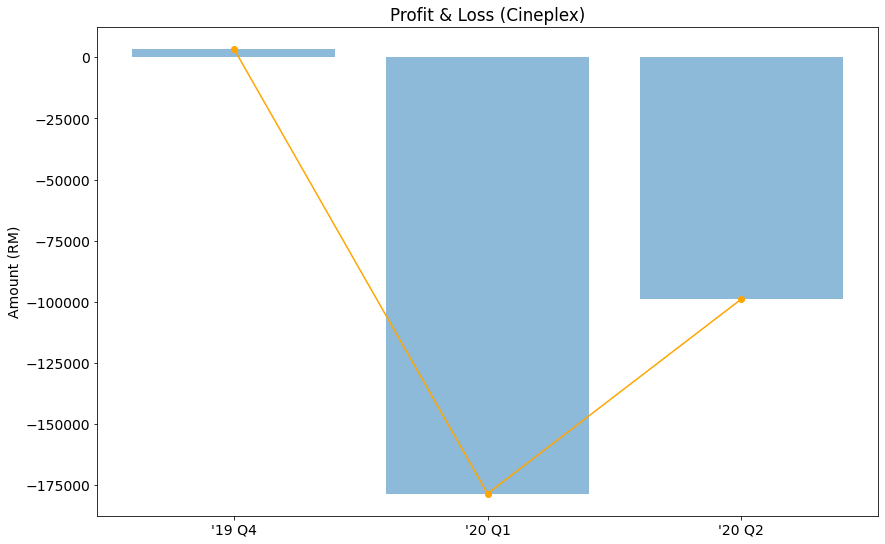

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, cineplex_pl, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, cineplex_pl, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Profit & Loss (Cineplex)')

plt.show()

#Wanda Film
source : https://www.reuters.com/companies/002739.SZ/financials/income-statement-quarterly

In [ ]:
wanda_revenue = revenue_df['wanda_cn_r']
wanda_revenue_c = revenue_change['wanda_cn_r_%']
wanda_pl = pl_df['wanda_cn_pl']
wanda_pl_c = pl_change['wanda_cn_pl_%']

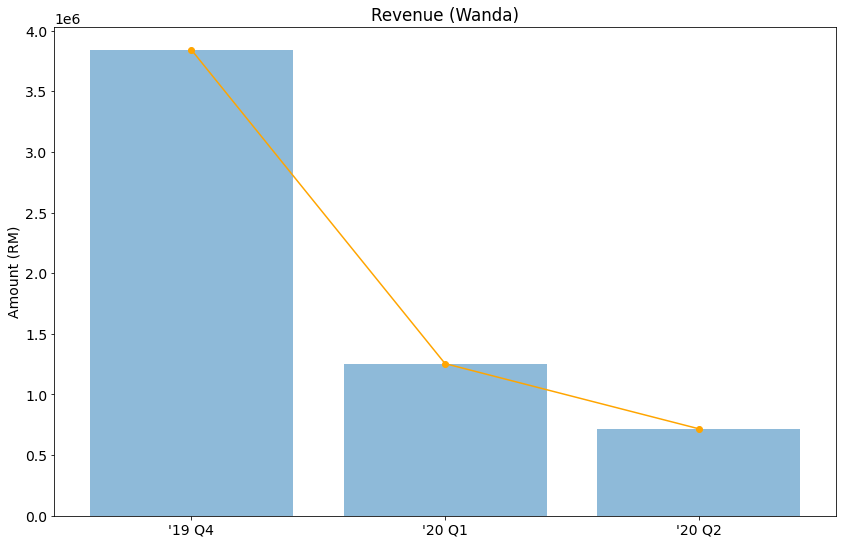

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, wanda_revenue, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, wanda_revenue, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Revenue (Wanda)')

plt.show()

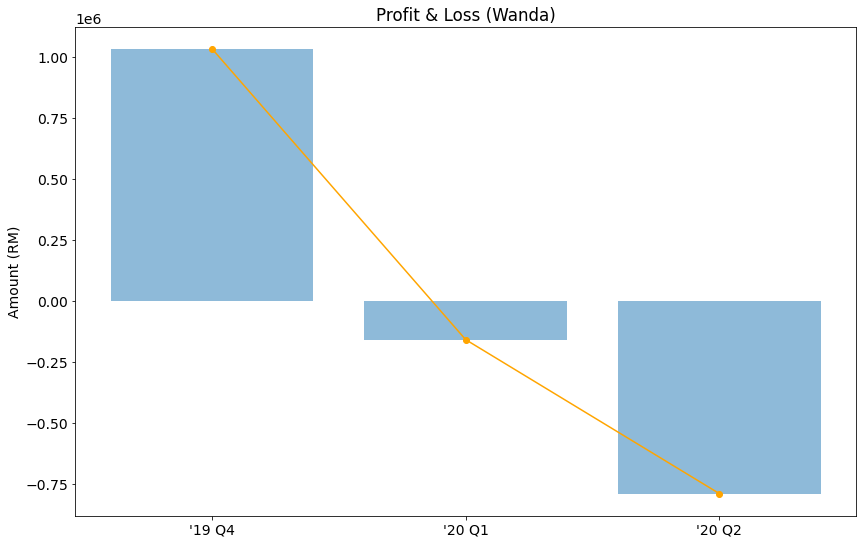

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, wanda_pl, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, wanda_pl, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Profit & Loss (Wanda)')

plt.show()

#Netflix
source : https://www.reuters.com/companies/002739.SZ/financials/income-statement-quarterly

In [ ]:
netflix_revenue = revenue_df['netflix_sm_r']
netflix_revenue_c = revenue_change['netflix_sm_r_%']
netflix_pl = pl_df['netflix_sm_pl']
netflix_pl_c = pl_change['netflix_sm_pl_%']

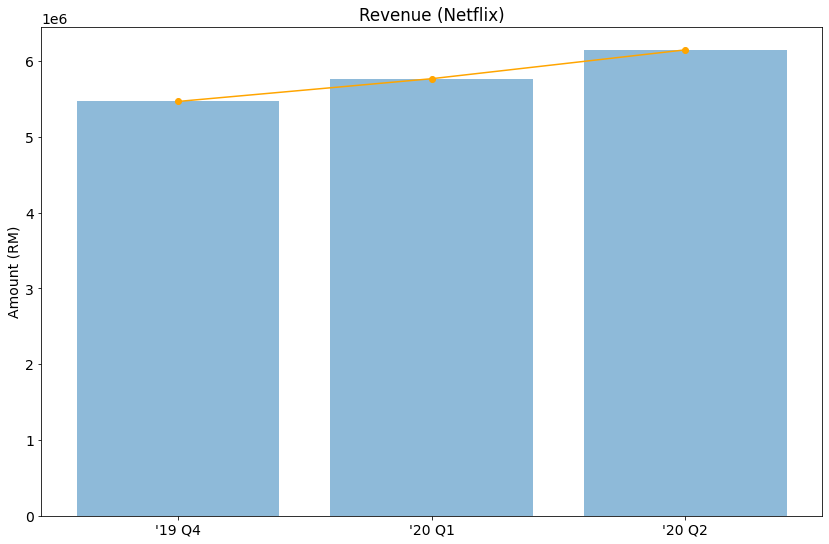

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, netflix_revenue, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, netflix_revenue, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Revenue (Netflix)')

plt.show()

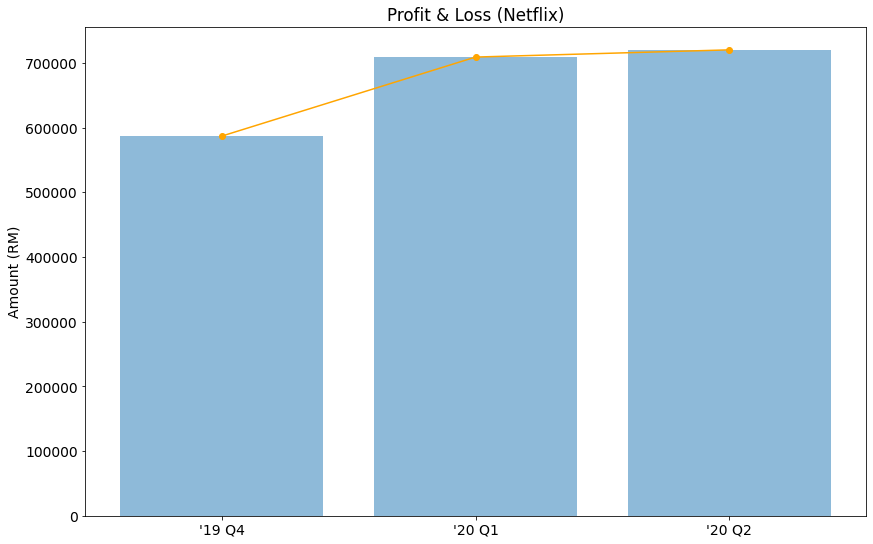

In [ ]:
_ = plt.rcParams["figure.figsize"] = [14,9]
_ = plt.rcParams.update({'font.size': 14})
_ = plt.bar(fin_quarters, netflix_pl, align='center', alpha=0.5)
_ = plt.plot(fin_quarters, netflix_pl, '-o', color='orange')
_ = plt.ylabel('Amount (RM)')
_ = plt.title('Profit & Loss (Netflix)')

plt.show()

#Correlation Analysis
base currency : USD 

This will enable a rough indication on relative sizes of the companies in relation to one another.

In [ ]:
!pip install alpha_vantage

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
import datetime 
import math

In [ ]:
cc = ForeignExchange(key='insert_key_here')

In [ ]:
current_time = datetime.datetime.now() 

currencies = {}

#MYR/USD
fx_1, _ = cc.get_currency_exchange_rate(from_currency='MYR',to_currency='USD')

#CND/USD
fx_2, _ = cc.get_currency_exchange_rate(from_currency='CAD',to_currency='USD')

#CNY/USD
fx_3, _ = cc.get_currency_exchange_rate(from_currency='CNY',to_currency='USD')

In [ ]:
currencies['myr_usd'] = fx_1['5. Exchange Rate']
currencies['cad_usd'] = fx_2['5. Exchange Rate']
currencies['cny_usd'] = fx_3['5. Exchange Rate']

In [ ]:
currencies

{'cad_usd': '0.75650000', 'cny_usd': '0.14790000', 'myr_usd': '0.24110000'}

In [ ]:
std_currency = pd.DataFrame(currencies.items(), columns = ['Pair', "Rate"])

print(f'Extracted at : {current_time}')
std_currency

Extracted at : 2020-09-17 16:13:56.783265


,Pair,Rate
0,myr_usd,0.24110000
1,cad_usd,0.75650000
2,cny_usd,0.14790000


In [ ]:
std_rev = revenue_df.copy()

std_rev['gsc_my_r'] = revenue_df['gsc_my_r'].apply(lambda x: math.ceil(x * float(currencies['myr_usd'])) )
std_rev['cineplex_ca_r'] = revenue_df['cineplex_ca_r'].apply(lambda x: math.ceil(x * float(currencies['cad_usd'])) )
std_rev['wanda_cn_r'] = revenue_df['wanda_cn_r'].apply(lambda x: math.ceil(x * float(currencies['cny_usd'])) )

std_cinema_rev = std_rev.iloc[:,1:5]

std_cinema_rev

,gsc_my_r,amc_us_r,cineplex_ca_r,wanda_cn_r
0,35558,1447700,335296,568117
1,18820,941500,275839,185569
2,353,18900,16634,106136


In [ ]:
std_pl = pl_df.copy()

std_rev['gsc_my_pl'] = pl_df['gsc_my_pl'].apply(lambda x: math.ceil(x * float(currencies['myr_usd'])) )
std_rev['cineplex_ca_pl'] = pl_df['cineplex_ca_pl'].apply(lambda x: math.ceil(x * float(currencies['cad_usd'])) )
std_rev['wanda_cn_pl'] = pl_df['wanda_cn_pl'].apply(lambda x: math.ceil(x * float(currencies['cny_usd'])) )

std_cinema_pl = std_pl.iloc[:,1:5]

std_cinema_pl

,gsc_my_pl,amc_us_pl,cineplex_ca_pl,wanda_cn_pl
0,11578,-13500,3472,1035090
1,-19473,-2176300,-178414,-157340
2,-41446,-561200,-98927,-788390


In [ ]:
cinema_rev = std_cinema_rev.iloc[0,:]

cinema_rev = pd.DataFrame(cinema_rev)

cinema_rev.rename(columns={0:'Relative_Sizing'}, inplace=True)

cinema_rev

,Relative_Sizing
gsc_my_r,35558
amc_us_r,1447700
cineplex_ca_r,335296
wanda_cn_r,568117


In [ ]:
#Creating the revenue volatility feature
rev_vol = std_cinema_rev.copy()

rev_vol.loc['gsc_my_r'] = std_cinema_rev['gsc_my_r'].std()
rev_vol.loc['amc_us_r'] = std_cinema_rev['amc_us_r'].std()
rev_vol.loc['cineplex_ca_r'] = std_cinema_rev['cineplex_ca_r'].std()
rev_vol.loc['wanda_cn_r'] = std_cinema_rev['wanda_cn_r'].std()

rev_vol = rev_vol.iloc[3:,0]

rev_vol = pd.DataFrame(rev_vol)

rev_vol.rename(columns={'gsc_my_r':'Revenue_Volatility'}, inplace=True)

rev_vol

,Revenue_Volatility
gsc_my_r,17609.574848
amc_us_r,724442.157801
cineplex_ca_r,169444.109329
wanda_cn_r,247008.440529


In [ ]:
#Creating the pl volatility feature
pl_vol = std_cinema_pl.copy()

pl_vol.loc['gsc_my_r'] = std_cinema_pl['gsc_my_pl'].std()
pl_vol.loc['amc_us_r'] = std_cinema_pl['amc_us_pl'].std()
pl_vol.loc['cineplex_ca_r'] = std_cinema_pl['cineplex_ca_pl'].std()
pl_vol.loc['wanda_cn_r'] = std_cinema_pl['wanda_cn_pl'].std()

pl_vol = pl_vol.iloc[3:,0]

pl_vol = pd.DataFrame(pl_vol)

pl_vol.rename(columns={'gsc_my_pl':'Profit_Loss_Volatility'}, inplace=True)

pl_vol

,Profit_Loss_Volatility
gsc_my_r,2.664120e+04
amc_us_r,1.124443e+06
cineplex_ca_r,9.118320e+04
wanda_cn_r,9.260303e+05


In [ ]:
size_rev_pl = pd.concat([cinema_rev, rev_vol, pl_vol], axis=1)

size_rev_pl

,Relative_Sizing,Revenue_Volatility,Profit_Loss_Volatility
gsc_my_r,35558,17609.574848,2.664120e+04
amc_us_r,1447700,724442.157801,1.124443e+06
cineplex_ca_r,335296,169444.109329,9.118320e+04
wanda_cn_r,568117,247008.440529,9.260303e+05


In [ ]:
size_rev_pl.loc['gsc_my'] = size_rev_pl.loc['gsc_my_r']
size_rev_pl.loc['amc_us'] = size_rev_pl.loc['amc_us_r']
size_rev_pl.loc['cineplex_ca'] = size_rev_pl.loc['cineplex_ca_r']
size_rev_pl.loc['wanda_cn'] = size_rev_pl.loc['wanda_cn_r']

size_rev_pl = size_rev_pl.iloc[4:]

size_rev_pl.rename(columns={0:'Relative_Sizing'}, inplace=True)

size_rev_pl

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Relative_Sizing,Revenue_Volatility,Profit_Loss_Volatility
gsc_my,35558.0,17609.574848,2.664120e+04
amc_us,1447700.0,724442.157801,1.124443e+06
cineplex_ca,335296.0,169444.109329,9.118320e+04
wanda_cn,568117.0,247008.440529,9.260303e+05


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


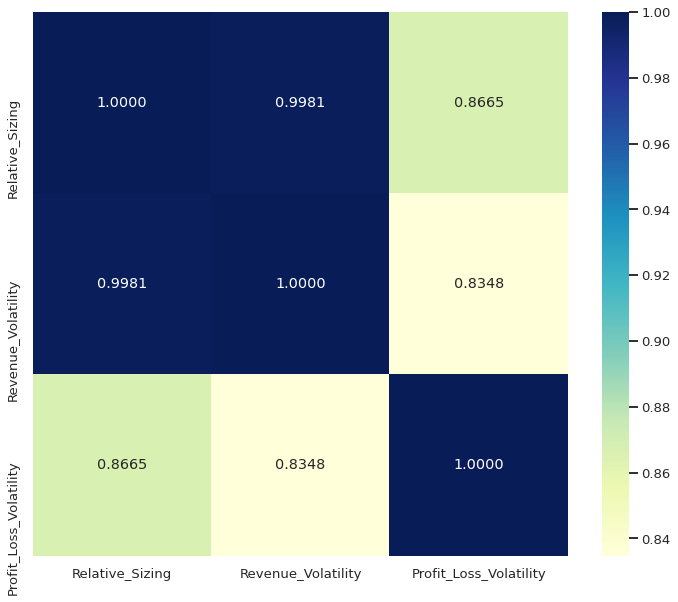

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=0.8)

sns.heatmap(size_rev_pl.corr(), cmap='YlGnBu', annot=True, fmt=".4f")